In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir, 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from modules import dataloading as dl
from modules import cleaning as c
import pandas as pd
targetdir = '../../src/data/'



# utility/data wrangling
import pandas as pd
import numpy as np
from warnings import filterwarnings

# chart creations
import matplotlib.pyplot as plt
import seaborn as sns

# pre processing
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import TomekLinks # down sampling
from imblearn.over_sampling import SMOTE # up sampling


# model selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Model Validation 
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# statistical testing
from scipy.stats import f_oneway
from scipy import stats

In [2]:
pop_density = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population_density')[1]
to_drop = [
'Geographic region',
'Population/sqkm',
'Rank'
]
pop_density.drop(columns=to_drop, inplace=True)

In [3]:
# Import data
adults_directory = '../../src/csv/employed_adults_apr2020_jul2020.csv'
col_pol_directory = '../../src/csv/pol_covid.csv'

In [4]:
df = c.catch_up(adults_directory, col_pol_directory)
df.target.value_counts()
df

,HEHOUSUT,HWHHWGT,GESTFIPS,GTMETSTA,HEFAMINC,HRNUMHOU,HRHTYPE,PRTAGE,PEMARITL,PENATVTY,...,PEEDUCA_46,PTDTRACE_1,PTDTRACE_3,PEHSPNON_2,state,month,population,case_delta,party,percent_red
0,1,40182430,1,1,16,3,1,31,1,1,...,0,0,0,1,Alabama,3.0,4903185.0,57709.606452,1.0,62.087493
1,1,26376142,1,1,15,3,1,53,1,1,...,0,0,0,1,Alabama,3.0,4903185.0,57709.606452,1.0,62.087493
2,1,37961372,1,1,13,3,1,53,1,1,...,0,0,0,1,Alabama,3.0,4903185.0,57709.606452,1.0,62.087493
3,1,38997054,1,1,15,4,1,35,1,1,...,0,0,0,1,Alabama,3.0,4903185.0,57709.606452,1.0,62.087493
4,1,42003612,1,1,11,8,3,40,0,1,...,0,1,0,1,Alabama,3.0,4903185.0,57709.606452,1.0,62.087493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,1,2614682,56,1,4,2,6,80,0,1,...,0,0,0,1,Wyoming,3.0,578759.0,1697.637634,1.0,69.958196
3979,1,3735059,56,1,6,1,6,55,0,1,...,0,0,0,1,Wyoming,3.0,578759.0,1697.637634,1.0,69.958196
3980,1,2859174,56,1,8,1,6,80,0,1,...,0,0,0,1,Wyoming,3.0,578759.0,1697.637634,1.0,69.958196
3981,1,4115505,56,1,10,7,1,35,1,1,...,0,0,0,1,Wyoming,3.0,578759.0,1697.637634,1.0,69.958196


In [5]:
pop_density.columns = ['state', 'pop_density']
pop_density.pop_density = pop_density.pop_density.astype(int)
df = df.merge(pop_density, on='state', how='left')

# Null values for anyone in DC

In [6]:
df = df[df.GESTFIPS != 11]
df

,HEHOUSUT,HWHHWGT,GESTFIPS,GTMETSTA,HEFAMINC,HRNUMHOU,HRHTYPE,PRTAGE,PEMARITL,PENATVTY,...,PTDTRACE_1,PTDTRACE_3,PEHSPNON_2,state,month,population,case_delta,party,percent_red,pop_density
0,1,40182430,1,1,16,3,1,31,1,1,...,0,0,1,Alabama,3.0,4903185.0,57709.606452,1.0,62.087493,95.0
1,1,26376142,1,1,15,3,1,53,1,1,...,0,0,1,Alabama,3.0,4903185.0,57709.606452,1.0,62.087493,95.0
2,1,37961372,1,1,13,3,1,53,1,1,...,0,0,1,Alabama,3.0,4903185.0,57709.606452,1.0,62.087493,95.0
3,1,38997054,1,1,15,4,1,35,1,1,...,0,0,1,Alabama,3.0,4903185.0,57709.606452,1.0,62.087493,95.0
4,1,42003612,1,1,11,8,3,40,0,1,...,1,0,1,Alabama,3.0,4903185.0,57709.606452,1.0,62.087493,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,1,2614682,56,1,4,2,6,80,0,1,...,0,0,1,Wyoming,3.0,578759.0,1697.637634,1.0,69.958196,6.0
3979,1,3735059,56,1,6,1,6,55,0,1,...,0,0,1,Wyoming,3.0,578759.0,1697.637634,1.0,69.958196,6.0
3980,1,2859174,56,1,8,1,6,80,0,1,...,0,0,1,Wyoming,3.0,578759.0,1697.637634,1.0,69.958196,6.0
3981,1,4115505,56,1,10,7,1,35,1,1,...,0,0,1,Wyoming,3.0,578759.0,1697.637634,1.0,69.958196,6.0


In [7]:
to_drop = [
    'state',
    'month', 
    'HH_ID',
    'IND_ID_FINAL',
]
df.drop(columns=to_drop, inplace=True)
df.party.value_counts()

1.0    1977
0.0    1926
Name: party, dtype: int64

In [8]:
df.to_csv('../../src/csv/final_dataframe_graphing.csv', index=None)
df.drop(columns=['GESTFIPS'], inplace=True)
df.to_csv('../../src/csv/final_dataframe.csv', index=None)

# Test train split

In [9]:
X = df.drop(columns=['target'])
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2927, 68), (2927,), (976, 68), (976,))

In [10]:
dTree_clf = DecisionTreeClassifier(class_weight='balanced')
dTree_clf.fit(X_train, y_train)
y_hat = dTree_clf.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       890
           1       0.14      0.12      0.13        86

    accuracy                           0.86       976
   macro avg       0.53      0.52      0.53       976
weighted avg       0.85      0.86      0.85       976



In [11]:
logReg = LogisticRegression(penalty='l2',class_weight='balanced')
logReg.fit(X_train, y_train)
y_hat_log = logReg.predict(X_test)
print(classification_report(y_test, y_hat_log))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       890
           1       0.08      0.20      0.11        86

    accuracy                           0.72       976
   macro avg       0.49      0.48      0.47       976
weighted avg       0.84      0.72      0.77       976



In [12]:
scalar= StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled  = scalar.transform(X_train)

In [13]:
logReg = LogisticRegression(class_weight='balanced')
logReg.fit(X_train_scaled, y_train)
y_hat_log = logReg.predict(X_train_scaled)
print(classification_report(y_train, y_hat_log))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      2732
           1       0.14      0.67      0.23       195

    accuracy                           0.70      2927
   macro avg       0.55      0.69      0.52      2927
weighted avg       0.91      0.70      0.78      2927



In [14]:
logReg = LogisticRegression(penalty='elasticnet', l1_ratio=0.01, C=0.01, solver='saga',class_weight='balanced', max_iter=10*7)
logReg.fit(X_train_scaled, y_train)
y_hat_log = logReg.predict(X_train_scaled)
print(classification_report(y_train, y_hat_log))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82      2732
           1       0.14      0.65      0.23       195

    accuracy                           0.71      2927
   macro avg       0.55      0.68      0.53      2927
weighted avg       0.91      0.71      0.78      2927



/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Dummy regression

In [15]:
dummy = [0 for x in y_train]
print(classification_report(y_train, dummy))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      2732
           1       0.00      0.00      0.00       195

    accuracy                           0.93      2927
   macro avg       0.47      0.50      0.48      2927
weighted avg       0.87      0.93      0.90      2927



/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
X = df.drop(columns =['target'])
y = df.target

scalar_final = StandardScaler()
X_scaled = scalar_final.fit_transform(X)
logReg = LogisticRegression(class_weight='balanced', solver='saga', penalty='l2', C=0.015)
logReg.fit(X_scaled, y)
y_hat_log = logReg.predict(X_scaled)
print(classification_report(y, y_hat_log))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      3622
           1       0.15      0.67      0.25       281

    accuracy                           0.71      3903
   macro avg       0.56      0.69      0.53      3903
weighted avg       0.91      0.71      0.78      3903



/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [17]:
y_pred_new_threshold = (logReg.predict_proba(X_scaled)[:,1]>=0.4).astype(int)
print(classification_report(y, y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.97      0.53      0.69      3622
           1       0.12      0.82      0.21       281

    accuracy                           0.55      3903
   macro avg       0.55      0.67      0.45      3903
weighted avg       0.91      0.55      0.65      3903



In [18]:
# grid_params = {
#     'penalty': ['l1', 'l2'],
#     'class_weight': [None, 'balanced'],
#     'C': np.linspace(0,1,1000)   
# }
# logReg_grid = LogisticRegression(solver='saga', max_iter=10**4)
# log_grid = GridSearchCV(logReg_grid, param_grid=grid_params, scoring='recall', cv=10, n_jobs=-1, verbose=1 )
# log_grid.fit(X_scaled, y)

# Most important features in losing your job:
     - Age PRTAGE
     - population of your state population
     - Part time medical conditions PEHRRSN2_1
     - native american populations PTDTRACE_3
     - Country of birth. American born more likely to be unemployed
     - People have have more than 1 job more likely to loose both.
     - people who worked in sales
     

In [73]:
coef_list = sorted(zip(X_train.columns.to_list(),logReg.coef_[0]), key=lambda x: x[1], reverse=True)
coef_list = [('PEHRRSN2_4', 0.12791888470310228),
 ('PRTAGE', 0.11997962364464325),
 ('population', 0.08629240348883842),
 ('PENATVTY', 0.0835137030698312),
 ('PRMJIND1_10', 0.07946028458828445),
 ('PEMJOT', 0.07451602183355875),
 ('PEHRRSN2_3', 0.07275775436335247),
 ('PEMARITL', 0.05917143009615273),
 ('PRAGNA', 0.05433387899169695),
 ('PRMJIND1_2', 0.04849754054782185),
 ('case_delta', 0.04310517536449647),
 ('PRMJIND1_11', 0.04098897978070467),
 ('PTDTRACE_3', 0.026040280135718304),
 ('PESEX_2', 0.01774987543313716),
 ('PEEDUCA_43', 0.010344077360354595),
 ('pop_density', 0.00990920038784068),
 ('PRMJOCC1_4', 0.005061728442107484),
 ('PEHRRSN2_5', 0.002119174182229764),
 ('PRMJOCC1_10', 0.0010083374434465976),
 ('party', 3.4673647417203396e-05),
 ('HEHOUSUT', 0.0),
 ('HRNUMHOU', 0.0),
 ('PEHRFTPT', 0.0),
 ('PRCITSHP_2', 0.0),
 ('PRCITSHP_3', 0.0),
 ('PRCITSHP_5', 0.0),
 ('PEHRRSN2_1', 0.0),
 ('PEHRRSN2_2', 0.0),
 ('PEHRRSN2_6', 0.0),
 ('PEHRRSN2_7', 0.0),
 ('PRMJIND1_3', 0.0),
 ('PRMJIND1_4', 0.0),
 ('PRMJIND1_6', 0.0),
 ('PRMJIND1_7', 0.0),
 ('PRMJIND1_9', 0.0),
 ('PRMJIND1_12', 0.0),
 ('PRMJOCC1_2', 0.0),
 ('PRMJOCC1_3', 0.0),
 ('PRMJOCC1_6', 0.0),
 ('PRMJOCC1_7', 0.0),
 ('PRMJOCC1_8', 0.0),
 ('PRMJOCC1_9', 0.0),
 ('PEEDUCA_40', 0.0),
 ('PEEDUCA_42', 0.0),
 ('PEEDUCA_44', 0.0),
 ('PEEDUCA_45', 0.0),
 ('PTDTRACE_1', 0.0),
 ('PEHSPNON_2', 0.0),
 ('HWHHWGT', -3.699842874558247e-05),
 ('PRNMCHLD', -4.711591972392344e-05),
 ('PRMJIND1_5', -0.00018995485003809437),
 ('HRHTYPE', -0.00028472946814202905),
 ('GTMETSTA', -0.0004248459954550815),
 ('HUBUS', -0.0005041326698757106),
 ('PRMJIND1_13', -0.0011480059817888365),
 ('PECYC', -0.0015526441295501995),
 ('PEMJNUM', -0.0015754193652904515),
 ('PECERT1', -0.002111225157580295),
 ('percent_red', -0.004153830115364483),
 ('PRINUSYR', -0.00685341006661304),
 ('PEEDUCA_41', -0.01778287217331979),
 ('PRMJOCC1_5', -0.024072114576131894),
 ('PRCITSHP_4', -0.04874971700270992),
 ('PEEDUCA_46', -0.05834621089257071),
 ('PRHRUSL', -0.06615587192529887),
 ('HEFAMINC', -0.14177332119017616),
 ('PRMJIND1_8', -0.15131353089753005),
 ('PEHRACTT', -0.4290377633644399)]
coef_list = [('PRTAGE', 0.1580869663386851),
 ('PRCITSHP_2', 0.12846675050750822),
 ('PEMJOT', 0.12152635320025758),
 ('PENATVTY', 0.11935063912125483),
 ('population', 0.11706422972436824),
 ('PRHRUSL', -0.08941315008517435),
 ('PEEDUCA_46', -0.09400037020156596),
 ('HEFAMINC', -0.1708102348663844),
 ('PRMJIND1_8', -0.1916587461436261),
 ('PEHRACTT', -0.4802735230545318)]
coef_df = pd.DataFrame(coef_list, columns=['Features', 'LogRegCoeff'])


In [70]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir, 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from modules import VizFig

images_dir = '../../src/images/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Setting global variables

dpi = 300
figsize = (6, 7.5)
fontscale = 1.4
sns.set(font_scale = fontscale, style = 'whitegrid')
markersize = 75


labels_dict = {'PESEX_x': 'Sex',
               'PREMPNOT_y': 'Employment Status',
               'PRTAGE_x': 'Age',
               'Features': 'Features',
               'LogRegCoeff': 'Logistic Regression\n Coefficients'
               
              }
ticks_dict = {'LogRegCoeff': ['Age', 
                              'Born on U.S. Islands', 
                              'Have More than 1 Job', 
                              'Born on Mainland U.S.', 
                              'Population of State', 
                              'Usual Hours Worked in a Week',
                              'Doctorate Degree',
                              'Family Income',
                              'Fin. Services Ind.',
                              'Actual Hours Worked in a Week'
                             ]
             }




def PlotCat(df, xvar,targetdir, yvar=None, orient=None, kind='count',palette="coolwarm_r"):
    """Plot a categorical plot with automatic labels provided in a global dict in CustomModule. 
        Pass a dataframe through `df`, a string through `xvar`, and where to save the image through
        `targetdir`. 
    """
    m_label = month_label(xvar)
    
    title = f'Scale of {labels_dict[xvar]}'
    

    fig = sns.catplot(data=df,
                x=xvar,
                y=yvar,
                kind = kind,
                orient = orient,
                height = figsize[0],
                aspect = figsize[1]/figsize[0],
                palette=palette
               )
    plt.ylabel(yvar)
    plt.xlabel('Scale')
    plt.title(title)
    labels = ticks_dict[xvar]
    plt.yticks(list(range(len(labels))), labels)

    fig.savefig(f'{targetdir}{title}.png', bbox_inches='tight')

    return plt.show()

def month_label(var):
    if '_y' in var:
        var = ' in July 2020'
    else:
        var= ''
    return var

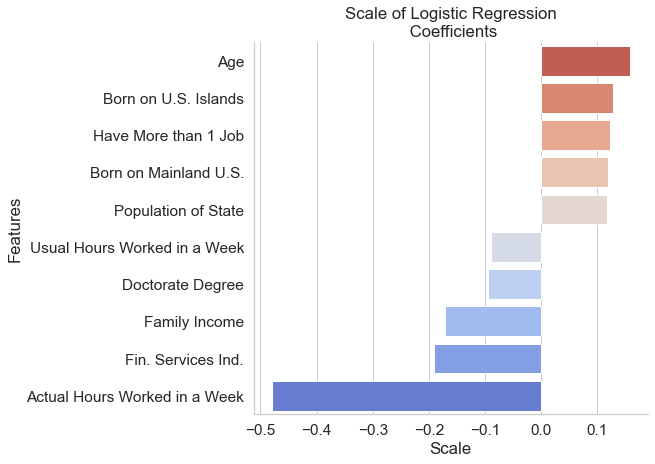

In [76]:
PlotCat(coef_df, yvar='Features',targetdir = images_dir, xvar='LogRegCoeff', orient='h',kind='bar')

In [30]:
[x for x in coef_list if x[0][:8] in ["PRMJIND1"]]

[('PRMJIND1_10', 0.15771490972531163),
 ('PRMJIND1_2', 0.08806483590288766),
 ('PRMJIND1_11', 0.08116798476410675),
 ('PRMJIND1_6', 0.06063516213462951),
 ('PRMJIND1_12', 0.024959291707677363),
 ('PRMJIND1_4', 0.011928841921116828),
 ('PRMJIND1_9', -0.0024904722892550406),
 ('PRMJIND1_7', -0.008715229156755709),
 ('PRMJIND1_3', -0.0648185861577069),
 ('PRMJIND1_13', -0.07068328989027207),
 ('PRMJIND1_5', -0.18524174271819904),
 ('PRMJIND1_8', -0.3394974464231217)]

In [31]:
[x for x in coef_list if x[0][:8] in ["PRMJOCC1"]]

[('PRMJOCC1_4', 0.19498953990693046),
 ('PRMJOCC1_7', 0.088688060730684),
 ('PRMJOCC1_8', 0.055790360293506855),
 ('PRMJOCC1_9', 0.016319311121921524),
 ('PRMJOCC1_10', -9.656240851708171e-06),
 ('PRMJOCC1_3', -0.00969246260329651),
 ('PRMJOCC1_5', -0.115774893695183),
 ('PRMJOCC1_2', -0.12116835888624614),
 ('PRMJOCC1_6', -0.17550532868454247)]

### positive 
PECYC == Years of college credit
PENATVTY == dummy country of birth
PEMARITL == dummy married or not
PRTAGE == persons age 
PEMJOT == more than one job dummy 1 yes 0 no
case_delta == change in cases between April and July


### negative 
PEHRACTT == sum of hours worked between all job
PRMJIND1_8 == works in finance
PEHRRSN2_1 == child care full time
PEEDUCA_41 == Associates degree
PEEDUCA_40 == Some college but not a degree
HEFAMINC == FAMILY INCOME
PRMJIND1_5 == Whole sale and retail trade

# Downsample dominant class using tomek links

In [223]:
X = df.drop(columns=['target'])
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2927, 68), (2927,), (976, 68), (976,))

In [224]:
#Instantiate the object
tl = TomekLinks()
# resample the data
X_res, y_res = tl.fit_resample(X_train.as_matrix(),y_train.as_matrix())

# conform back to data frames
df_X_res = pd.DataFrame(np.matrix(X_res))
df_y_res = pd.DataFrame(np.matrix(y_res))

# rename the columns
df_X_res.columns = X.columns
df_y_res = df_y_res.T
df_y_res.columns = ['default']

# join them back together
df_res=pd.concat([df_X_res, df_y_res],axis=1)
df_y_res.default.value_counts()

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


0    2605
1     195
Name: default, dtype: int64

# Scale

In [225]:
scalar= StandardScaler()
X_train_scaled = scalar.fit_transform(df_X_res)
X_test_scaled  = scalar.transform(X_test)

In [226]:
logReg = LogisticRegression(class_weight='balanced',)
logReg.fit(X_train_scaled, df_y_res)
y_hat_log = logReg.predict(X_test_scaled)
print(classification_report(y_test, y_hat))

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       890
           1       0.16      0.16      0.16        86

    accuracy                           0.85       976
   macro avg       0.54      0.54      0.54       976
weighted avg       0.85      0.85      0.85       976



In [227]:
confusion_matrix(y_test, y_hat)

array([[818,  72],
       [ 72,  14]])

## Scale continuous variables

In [ ]:
X = df.drop(columns=['target'])
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [35]:
pop_density = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population_density')[1]

In [36]:
pop_density.columns.to_list()

['Rank',
 'State/Territory/Division/Region',
 'Population/sqmi',
 'Population/sqkm',
 'Geographic region']

In [40]:
to_drop = [
'Geographic region',
'Population/sqkm',
'Rank'
]
pop_density.drop(columns=to_drop, inplace=True)

In [9]:
# import data'
# apr_2020_df = dl.CPS_raw(targetdir, ['apr2020'], None)
# jul_2020_df = dl.CPS_raw(targetdir, ['jul2020'], None)
# jan_feb_2020_df = dl.CPS_raw(targetdir, ['jan2020', 'feb2020'], None)


In [41]:
apr_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129382 entries, 0 to 129381
Columns: 391 entries, HRHHID to IND_ID_FINAL
dtypes: int64(387), object(4)
memory usage: 386.0+ MB


# We decided on which columns to keep and which to discard

The target variable will be change in employment status from having a job to not. We could also make a conditional where if the they WHERE full time (40 hours+) but now are not, that could also represent a change in the employment status.


But if our question is: How many people lost full time work during the first wave of the pandemic, The data set becomes much simpler.

In [68]:
to_keep = [
    'PREMPNOT', # EMPLOY TARGET VARIABLE
    'PEMLR', # TARGET VARIABLE 1-6 employment status
    'PRPERTYP', # Type of person recode 
    'HEHOUSUT', # type of housing unit to dummy
    'HETENURE', # rent or morgage status
    'HWHHWGT', # Household weight
    'GESTFIPS', # state codes
    "GTMETSTA", # Metropolitan or not
    'HEFAMINC', # total family income
    "HRNUMHOU", # total number of people living in the house hold
    'HRHTYPE', # household type eg civilian or married etc
    'PERRP', # relationship to reference, -1, 40 and 41
    'PRTAGE', # person's age
    'PEMARITL', # marital status
    'PESPOUSE', # line number of spouse (-1) == no spouse
    'PESEX', # gender 1 == male, 2 == female
    'PEEDUCA', # level of education see dict for coding
    'PTDTRACE', # race composition of the house. See data dict
    "PEHSPNON", # hispanic or not hispanic
    'PUCHINHH', # change in household composition. See data dict
    'PENATVTY', # country of birth ie US born or not
    "PEMNTVTY", # mothers country of birth, 
    "PEFNTVTY", # fathers country of birth ie are they a first generation imiigrant?
    "PRCITSHP", # citezen status
    "PRINUSYR", # Year since immigration -1== us born, else coded by decade
    "PUABSOT", # Did you have a job last week TARGET POTENTIAL
    "PULAY", # Where you on layoff from your job last week?
    "PEABSRSN", # reason for not being at work the day before.
    "PRHRUSL", # Hours at work, dummy into full time or not full time
    "HUBUS", # Does anyone have a business or a farm?
    "PEMJOT", # Do you have more than 1 job?
    "PEMJNUM", # how many jobs do you have?
    "PEHRFTPT", # Do you normally spend more than 35 hours a week at your main job?
    "PEHRRSN2", # what is the main reason you do not want to work 35 hours. Speaks to motivation of keeping job.
    "PEHRACTT", # sum of hours worked between all jobs
    "PRCIVLF", # in the civiliarn labour force = 1 
    "PRAGNA", # Agricultural industry yes or no
    "PRMJIND1", # industry recode
    "PEERNUOT", # Do you usually recieve tips at your work
    "PEERNHRY", # hourly vs non-hourly status
    "PRERNWA", # weekly earnings
    "PEERNLAB", # part of a labour union
    "PRNLFSCH", # In school or not
    "PRNMCHLD", # number of children less than 18 years old (-1 not a parent, 0-99 number of children)
    "PECYC", # How much college credit in years has the reference person recieved?
    "PEIO1ICD", # Inustry code for primary jobs lin1
    "PEIO1OCD", # Occupation code for primary jobs lin1
    "PECERT1", # Do you have a professional certification issued at state or federal level.
    "PUIODP2", # did your job change last month
]

In [69]:
len(to_keep)

49

In [1]:
#"PRMJIND1" & PRMJIND2,  industry codes Primary business industry job 1

"""
1 Agriculture, forestry, fishing, and hunting\
2 Mining
3 Construction
4 Manufacturing
5 Wholesale and retail trade
6 Transportation and utilities      
7 Information
8 Financial activities
9 Professional and business services
10 Educational and health services
11 Leisure and hospitality
12 Other services
13 Public administration
14 Armed Forces"""

'\n1 Agriculture, forestry, fishing, and hunting2 Mining\n3 Construction\n4 Manufacturing\n5 Wholesale and retail trade\n6 Transportation and utilities      \n7 Information\n8 Financial activities\n9 Professional and business services\n10 Educational and health services\n11 Leisure and hospitality\n12 Other services\n13 Public administration\n14 Armed Forces'

In [67]:
"""U.S. Census Bureau
2020 Current Population Survey Public Use Industry Code List					
					
	*  0010 - 0560  Agriculture, Forestry, Fishing and Hunting, and Mining				
	*  0770 - 1060  Construction				
	*  1070 - 4060  Manufacturing				
	*  4070 - 4660  Wholesale Trade				
	*  4670 - 6060  Retail Trade				
	*  6070 - 6460, 0570 - 0760  Transportation and Warehousing, and Utilities				
	*  6470 - 6860  Information				
	*  6870 - 7260  Finance and Insurance,  and Real Estate and Rental and Leasing				
	*  7270 - 7790  Professional, Scientific, and Management, and  Administrative and Waste Management Services				
	*  7860 - 8490  Educational Services, and Health Care and Social Assistance				
	*  8560 - 8690  Arts, Entertainment, and Recreation, and  Accommodation and Food Services				
	*  8770 - 9290  Other Services (except Public Administration)				
	*  9370 - 9590  Public Administration				
	*  9890         Military	"""

'U.S. Census Bureau\t\t\t\t\t\n2020 Current Population Survey Public Use Industry Code List\t\t\t\t\t\n\t\t\t\t\t\n\t*  0010 - 0560  Agriculture, Forestry, Fishing and Hunting, and Mining\t\t\t\t\n\t*  0770 - 1060  Construction\t\t\t\t\n\t*  1070 - 4060  Manufacturing\t\t\t\t\n\t*  4070 - 4660  Wholesale Trade\t\t\t\t\n\t*  4670 - 6060  Retail Trade\t\t\t\t\n\t*  6070 - 6460, 0570 - 0760  Transportation and Warehousing, and Utilities\t\t\t\t\n\t*  6470 - 6860  Information\t\t\t\t\n\t*  6870 - 7260  Finance and Insurance,  and Real Estate and Rental and Leasing\t\t\t\t\n\t*  7270 - 7790  Professional, Scientific, and Management, and  Administrative and Waste Management Services\t\t\t\t\n\t*  7860 - 8490  Educational Services, and Health Care and Social Assistance\t\t\t\t\n\t*  8560 - 8690  Arts, Entertainment, and Recreation, and  Accommodation and Food Services\t\t\t\t\n\t*  8770 - 9290  Other Services (except Public Administration)\t\t\t\t\n\t*  9370 - 9590  Public Administration\t\t\

In [20]:
apr_cleaned = c.clean_CPS_df(apr_2020_df)
jul_cleaned = c.clean_CPS_df(jul_2020_df)